In [35]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

%matplotlib inline

import sys
print(sys.version_info)
# File to get
urli = "https://www.ngdc.noaa.gov/nndc/struts/results?type_0=Exact&query_0=$ID&t=101650&s=13&d=189&dfn=signif.txt"
# File to save
file_name = "signif.txt"

if sys.version_info<(3,0,0):
    import urllib
    file = urllib.urlretrieve(urli, file_name)
else:
    import urllib.request
    file = urllib.request.urlretrieve(urli, file_name)

# Read first line, parse to column labels
with open(file_name, 'r') as f:
    columns = f.readline().split("\t")
    
# read earthquakes to datafarame
qbc = pd.read_csv(file_name, sep="\t", header = None, names=columns)
# Drop first row (double titles)
qbc.drop(0, inplace=True)

sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [36]:
qbc.columns

Index(['I_D', 'FLAG_TSUNAMI', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE',
       'SECOND', 'FOCAL_DEPTH', 'EQ_PRIMARY', 'EQ_MAG_MW', 'EQ_MAG_MS',
       'EQ_MAG_MB', 'EQ_MAG_ML', 'EQ_MAG_MFA', 'EQ_MAG_UNK', 'INTENSITY',
       'COUNTRY', 'STATE', 'LOCATION_NAME', 'LATITUDE', 'LONGITUDE',
       'REGION_CODE', 'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING',
       'MISSING_DESCRIPTION', 'INJURIES', 'INJURIES_DESCRIPTION',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'HOUSES_DAMAGED',
       'HOUSES_DAMAGED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_HOUSES_DAMAGED',
       'TOTAL_HOUSES_DAMAGED_DESCRIPTION\n'],
      dtype='object')

In [37]:
qbc.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
1,1,NaN,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,-2000,NaN,NaN,NaN,NaN,NaN,18,7.1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN
3,2,Tsu,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5877,Tsu,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
5,8,NaN,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
columns = ['YEAR', 'FOCAL_DEPTH', 'EQ_PRIMARY', 'LATITUDE', 'LONGITUDE']
qbc = pd.DataFrame(qbc, columns = columns)

In [56]:
qbc.head()

,YEAR,FOCAL_DEPTH,EQ_PRIMARY,LATITUDE,LONGITUDE
1,-2150,NaN,7.3,31.1,35.5
2,-2000,18,7.1,38,58.2
8,-1250,NaN,6.5,32,35.5
9,-1050,NaN,6.2,29.6,35
15,-479,NaN,7,39.7,23.3


In [47]:
# replace empty strings to nan
qbc['LATITUDE'].replace('       ', np.nan, inplace=True)

# Drop rows wiw nan values from selected columns
qbc.dropna(subset=['EQ_PRIMARY', 'LONGITUDE', 'LATITUDE'], inplace = True)

# convert strings to float (and int)
qbc.loc[:,['EQ_PRIMARY', 'LATITUDE', 'LONGITUDE']] = qbc.loc[:,['EQ_PRIMARY', 'LATITUDE', 'LONGITUDE']].astype('float')
qbc['YEAR'] = qbc['YEAR'].apply(int)

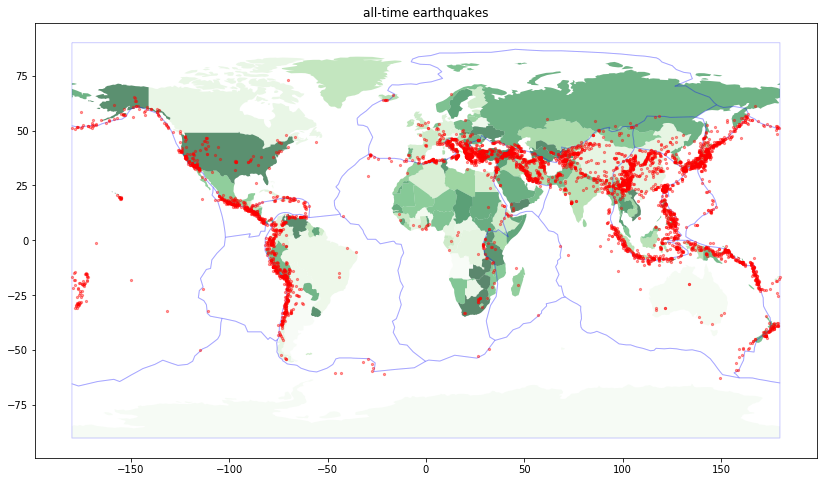

In [59]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


world = world.to_crs({'init': 'epsg:4326'})

fig, ax = plt.subplots(figsize=(14,8))
ax.set_title('all-time earthquakes')
ax = world.plot(ax=ax, alpha=0.8, cmap='Greens')

tectonic = gpd.read_file('plates.shp')
tectonic.plot(ax=ax, alpha=0.2, lw=1, edgecolor='blue', facecolor='white')

plt.scatter(qbc.LONGITUDE, qbc.LATITUDE, s=5, alpha=0.4, color='red')
plt.show()

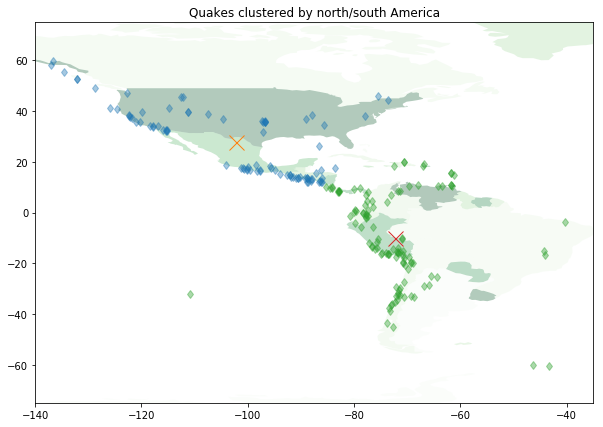

In [65]:
# drop nan values from depth
qbc.dropna(subset=['FOCAL_DEPTH'], inplace= True)
#convert depth values to float
qbc['FOCAL_DEPTH'] = qbc['FOCAL_DEPTH'].apply(float)

# lets limit area to be examined to the american continent, years 2000-
limx = [-140, -35]
limy = [-75, 75]
area = qbc.loc[(qbc['LONGITUDE'] > limx[0]) &
              (qbc['LONGITUDE'] < limx[1]) &
              (qbc['LATITUDE'] > limy[0]) &
              (qbc['LATITUDE'] < limy[1]) &
              (qbc['YEAR'] > 1999)]
# import clustering from sklearn
from sklearn import cluster

# select 'lat' & 'long' for inputs
cols = ['LATITUDE' , 'LONGITUDE']
x = area[cols].copy()

c = 2 # create 'c' clusters
kmeans = cluster.KMeans(n_clusters = c)

#fit kmeans
kmeans.fit(x)

# Get labels (0,1),  indicating which cluster point belongs to
labels = kmeans.labels_

# get centroids (the arithmetic mean position of all the points)
centroids = kmeans.cluster_centers_

# new column for clusters
x['cluster'] = labels

# Visualize
fig, ax = plt.subplots(figsize=(10,7))

# Zoom in
ax.set_xlim(limx)
ax.set_ylim (limy)

# world map
ax = world.plot(ax=ax, alpha=0.3, cmap='Greens')
ax.set_title('Quakes clustered by north/south America')

# Plot clusters and centroids

for i in range(0,c):
    # select data by plates
    data = x.loc[x['cluster'] ==i]
    # plot the data observations
    plt.plot(data.iloc[:,1],data.iloc[:,0],'d', alpha=0.4)
    # plot the centroids
    lines = plt.plot(centroids[i,1], centroids[i,0],'x', ms=15)

plt.show()